The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Variables 

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

Data Description 

Demographic: 

• Sex: male or female("M" or "F") 

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral 

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal) • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current) 

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous) 

• Dia BP: diastolic blood pressure (Continuous) 

• BMI: Body Mass Index (Continuous) 

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 

• Glucose: glucose level (Continuous) 

Predict variable (desired target) 

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

In [440]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


In [441]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [442]:
# Importing the dataset
data = pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv')

In [443]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [444]:
data.shape

(3390, 17)

In [445]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [446]:
data.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

It shows the number of np.nan or null values or missing values are present in the dataset:

education: 87

cigsPerDay: 22

BPMeds: 44

totChol: 38

BMI: 14

heartRate: 1

glucose: 304

In [447]:
data.dtypes

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [448]:
data.duplicated().sum()

0

It shows that there are no Duplicated Values present in the dataset.

In [449]:
print((data["glucose"].mode())[0])

75.0


In [450]:
data["glucose"].fillna((data["glucose"].mode())[0], inplace=True)

In [451]:
data.isnull().sum()

id                  0
age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay         22
BPMeds             44
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            38
sysBP               0
diaBP               0
BMI                14
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [452]:
details_1 = ['education','cigsPerDay','BPMeds','totChol','BMI']

In [453]:
def UVA_numeric(updated_data, var_group):
    size = len(var_group)
    plt.figure(figsize = (7*size,3), dpi = 100)
    for j,i in enumerate(var_group):
        mini = updated_data[i].min()
        maxi = updated_data[i].max()
        mean = updated_data[i].mean()
        median = updated_data[i].median()
        st_dev = updated_data[i].std()
        skew = updated_data[i].skew()
        kurt = updated_data[i].kurtosis()
        points = mean-st_dev, mean+st_dev
        plt.subplot(1,size,j+1)
        sns.kdeplot(updated_data[i], shade=True)
        sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
        sns.scatterplot([mini,maxi], [0,0], color = 'orange', label= "min/max")
        sns.scatterplot([mean], [0], color = 'red', label = "mean")
        sns.scatterplot([median], [0], color = 'blue', label = "median")
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {};\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                        round(kurt,2),
                                                                                        round(skew,2),
                                                                                        (round(mini,2),round(maxi,2)),
                                                                                        round(mean,2),
                                                                                        round(median,2)))

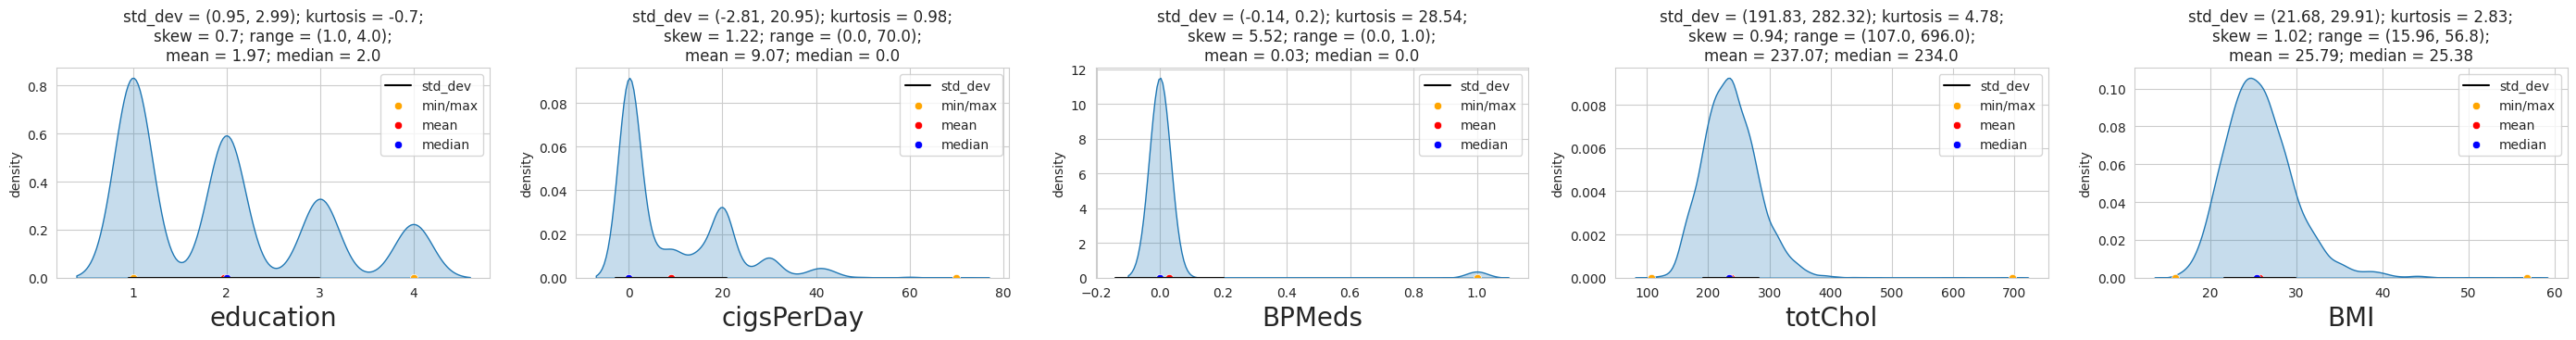

In [454]:
UVA_numeric(data, details_1)

In [455]:
data.isnull().sum()

id                  0
age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay         22
BPMeds             44
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            38
sysBP               0
diaBP               0
BMI                14
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [456]:
data["education"].fillna((data["education"].mode())[0], inplace=True)
data["cigsPerDay"].fillna((data["cigsPerDay"].mode())[0], inplace=True)


In [457]:
data.isnull().sum()

id                  0
age                 0
education           0
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds             44
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            38
sysBP               0
diaBP               0
BMI                14
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [ ]:
data["BPMeds"].fillna((data["BPMeds"].mode())[0], inplace=True)
data["totChol"].fillna((data["totChol"].mode())[0], inplace=True)
data["BMI"].fillna((data["BMI"].mode())[0], inplace=True)

In [458]:
data["BPMeds"].fillna((data["BPMeds"].mean()), inplace=True)
data["totChol"].fillna((data["totChol"].mean()), inplace=True)
data["BMI"].fillna((data["BMI"].mean()), inplace=True)

In [459]:
data.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose            0
TenYearCHD         0
dtype: int64

Filling the missing spaces of glucosecolumn with the mode of the data (Mode = 75) present to reduce the number of missing data in our dataset

In [460]:
data.dropna(inplace=True)
data.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Dropping all other rows containing missing values

In [461]:
data.drop(['id',],axis=1,inplace=True)

In [462]:
data.shape

(3389, 16)

In [463]:
details_1 = ['totChol','sysBP']

In [464]:
def UVA_numeric(updated_data, var_group):
    size = len(var_group)
    plt.figure(figsize = (7*size,3), dpi = 100)
    for j,i in enumerate(var_group):
        mini = updated_data[i].min()
        maxi = updated_data[i].max()
        mean = updated_data[i].mean()
        median = updated_data[i].median()
        st_dev = updated_data[i].std()
        skew = updated_data[i].skew()
        kurt = updated_data[i].kurtosis()
        points = mean-st_dev, mean+st_dev
        plt.subplot(1,size,j+1)
        sns.kdeplot(updated_data[i], shade=True)
        sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
        sns.scatterplot([mini,maxi], [0,0], color = 'orange', label= "min/max")
        sns.scatterplot([mean], [0], color = 'red', label = "mean")
        sns.scatterplot([median], [0], color = 'blue', label = "median")
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {};\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                        round(kurt,2),
                                                                                        round(skew,2),
                                                                                        (round(mini,2),round(maxi,2)),
                                                                                        round(mean,2),
                                                                                        round(median,2)))

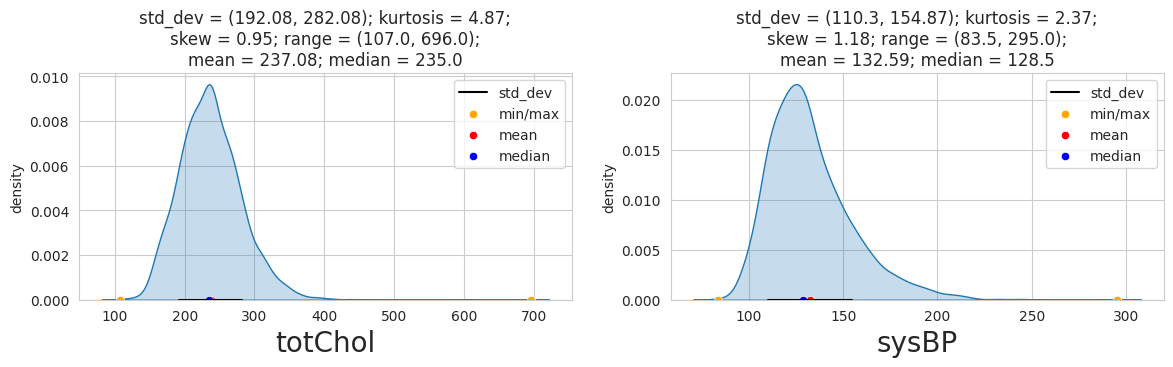

In [465]:
UVA_numeric(data, details_1)

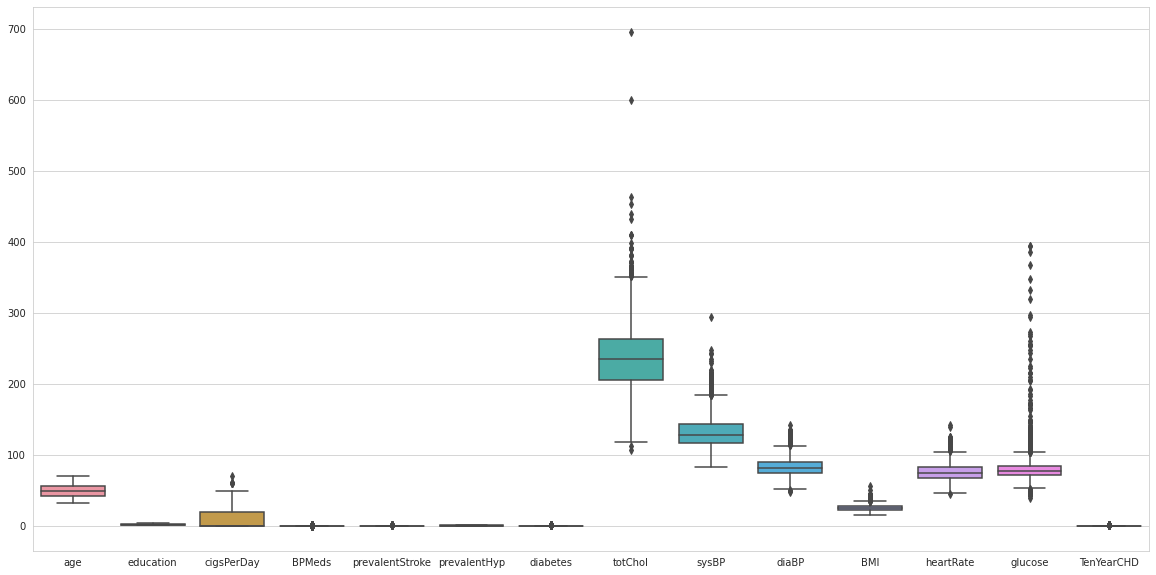

In [466]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

In [467]:
data.head(3)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0


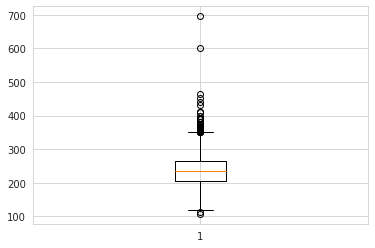

In [468]:
plt.boxplot(data["totChol"])
plt.show()

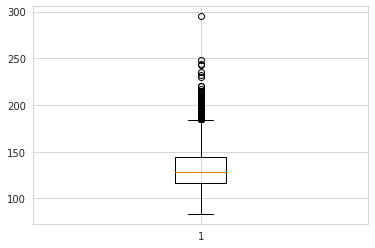

In [469]:
plt.boxplot(data["sysBP"])
plt.show()

In [470]:
data['totChol'].describe()

count    3389.000000
mean      237.079617
std        44.998609
min       107.000000
25%       206.000000
50%       235.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

In [471]:
data['sysBP'].describe()

count    3389.000000
mean      132.589407
std        22.284776
min        83.500000
25%       117.000000
50%       128.500000
75%       144.000000
max       295.000000
Name: sysBP, dtype: float64

In [472]:
data.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [473]:
features=['totChol', 'sysBP', 'glucose']

In [474]:
def iqr_capping(data, cols, factor):
  for col in cols:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)

    iqr=q3-q1

    upper_whisker = q3+(factor*iqr)
    lower_whisker = q1-(factor*iqr)

    data[col] = np.where(data[col]>upper_whisker, upper_whisker, np.where(data[col]<lower_whisker, lower_whisker,data[col]))

In [475]:
iqr_capping(data,features, 1.5)

**Removable Outliers are detected in totChol and sysBP columns of our dataset. Outliers in all other numerical columns are important and thus cannot be removed.**

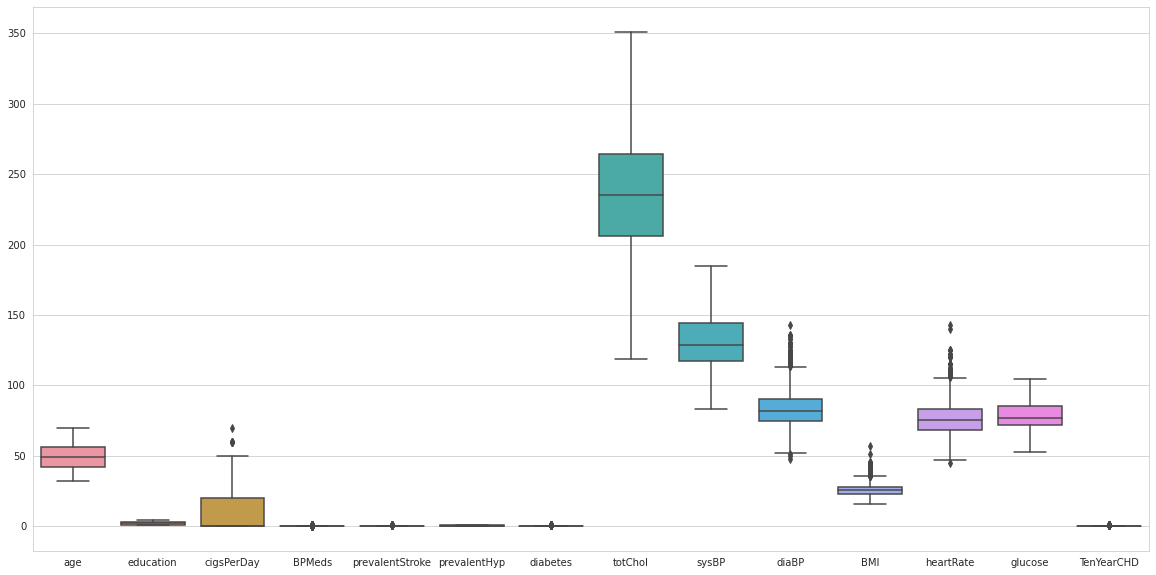

In [476]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

In [477]:
data.shape

(3389, 16)

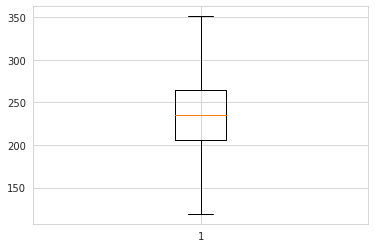

In [478]:
plt.boxplot(data["totChol"])
plt.show()

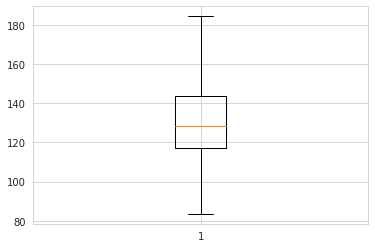

In [479]:
plt.boxplot(data["sysBP"])
plt.show()

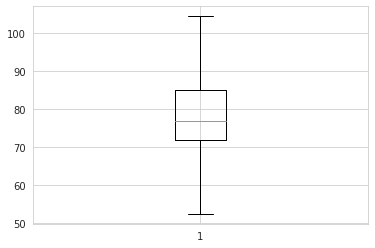

In [480]:
plt.boxplot(data["glucose"])
plt.show()

In [481]:
data

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.000000,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.000000,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.000000,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.000000,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.000000,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.000000,0,0,0,261.0,123.5,79.0,29.280000,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.000000,0,0,0,199.0,102.0,56.0,21.960000,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.000000,0,1,0,351.0,164.0,119.0,28.920000,73.0,72.0,1
3388,60,1.0,M,NO,0.0,0.029886,0,1,0,191.0,167.0,105.0,23.010000,80.0,85.0,0


In [482]:
data.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [483]:
details_1 = ['totChol','sysBP']

In [484]:
def UVA_numeric(updated_data, var_group):
    size = len(var_group)
    plt.figure(figsize = (7*size,3), dpi = 100)
    for j,i in enumerate(var_group):
        mini = updated_data[i].min()
        maxi = updated_data[i].max()
        mean = updated_data[i].mean()
        median = updated_data[i].median()
        st_dev = updated_data[i].std()
        skew = updated_data[i].skew()
        kurt = updated_data[i].kurtosis()
        points = mean-st_dev, mean+st_dev
        plt.subplot(1,size,j+1)
        sns.kdeplot(updated_data[i], shade=True)
        sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
        sns.scatterplot([mini,maxi], [0,0], color = 'orange', label= "min/max")
        sns.scatterplot([mean], [0], color = 'red', label = "mean")
        sns.scatterplot([median], [0], color = 'blue', label = "median")
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {};\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                        round(kurt,2),
                                                                                        round(skew,2),
                                                                                        (round(mini,2),round(maxi,2)),
                                                                                        round(mean,2),
                                                                                        round(median,2)))

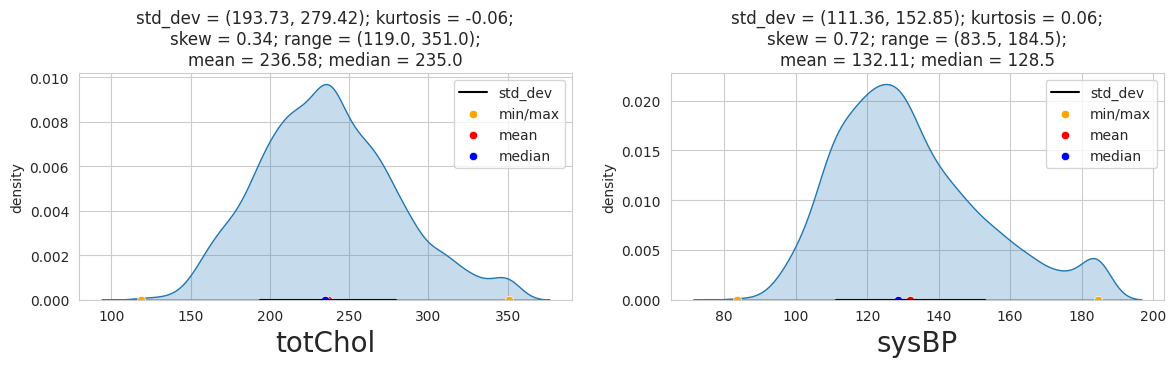

In [485]:
UVA_numeric(data, details_1)

In [486]:
data['totChol'].describe()

count    3389.000000
mean      236.578584
std        42.843836
min       119.000000
25%       206.000000
50%       235.000000
75%       264.000000
max       351.000000
Name: totChol, dtype: float64

In [487]:
data['sysBP'].describe()

count    3389.000000
mean      132.105341
std        20.743304
min        83.500000
25%       117.000000
50%       128.500000
75%       144.000000
max       184.500000
Name: sysBP, dtype: float64

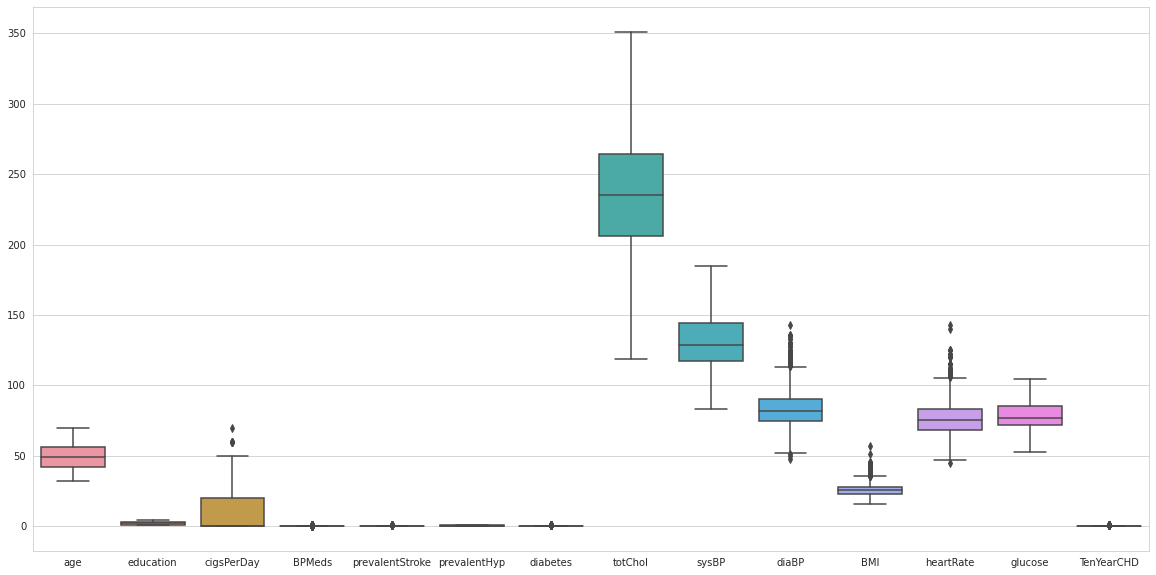

In [488]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

Now with the missing values, outliers and duplicate values dealt with, we proceed to perform EDA

**Exploratory Data Analysis**

In [489]:
data.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000
mean,49.537917,1.946297,9.007967,0.029895,0.006492,0.315137,0.025671,236.578584,132.105341,82.885364,25.793933,75.977279,79.218058,0.150487
std,8.590555,1.017588,11.863584,0.169215,0.080320,0.464639,0.158176,42.843836,20.743304,12.024592,4.107106,11.971868,11.592174,0.357601
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,119.000000,83.500000,48.000000,15.960000,45.000000,52.500000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,235.000000,128.500000,82.000000,25.400000,75.000000,77.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,27.990000,83.000000,85.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,351.000000,184.500000,142.500000,56.800000,143.000000,104.500000,1.000000


An overall Statistical Information is shown

It is clearly evident that none of the data is missing in columns.

It also shows the mean, standard deviation and other statistical metrices of the dataset

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.170245,-0.191937,0.123402,0.059103,0.308322,0.108001,0.283603,0.409017,0.222328,0.137295,-0.002596,0.115881,0.224028
education,-0.170245,1.000000,0.014289,-0.019968,-0.031846,-0.081557,-0.051947,-0.019784,-0.134432,-0.060965,-0.135621,-0.039423,-0.029559,-0.050785
cigsPerDay,-0.191937,0.014289,1.000000,-0.035840,-0.041561,-0.078365,-0.048082,-0.023905,-0.100874,-0.068183,-0.100085,0.066253,-0.086398,0.067551
BPMeds,0.123402,-0.019968,-0.035840,1.000000,0.116666,0.257679,0.070896,0.083579,0.253015,0.199114,0.087355,0.018041,0.011318,0.087617
prevalentStroke,0.059103,-0.031846,-0.041561,0.116666,1.000000,0.071710,0.010111,-0.009412,0.061328,0.047223,0.017764,-0.019184,0.010684,0.068741
prevalentHyp,0.308322,-0.081557,-0.078365,0.257679,0.071710,1.000000,0.082663,0.156751,0.717200,0.613418,0.299480,0.150815,0.081685,0.165703
diabetes,0.108001,-0.051947,-0.048082,0.070896,0.010111,0.082663,1.000000,0.051074,0.115266,0.061138,0.088154,0.039742,0.261907,0.103881
totChol,0.283603,-0.019784,-0.023905,0.083579,-0.009412,0.156751,0.051074,1.000000,0.206292,0.158209,0.121067,0.082849,0.045714,0.092269
sysBP,0.409017,-0.134432,-0.100874,0.253015,0.061328,0.717200,0.115266,0.206292,1.000000,0.779097,0.334396,0.179242,0.116613,0.202824
diaBP,0.222328,-0.060965,-0.068183,0.199114,0.047223,0.613418,0.061138,0.158209,0.779097,1.000000,0.379891,0.174904,0.053453,0.136560


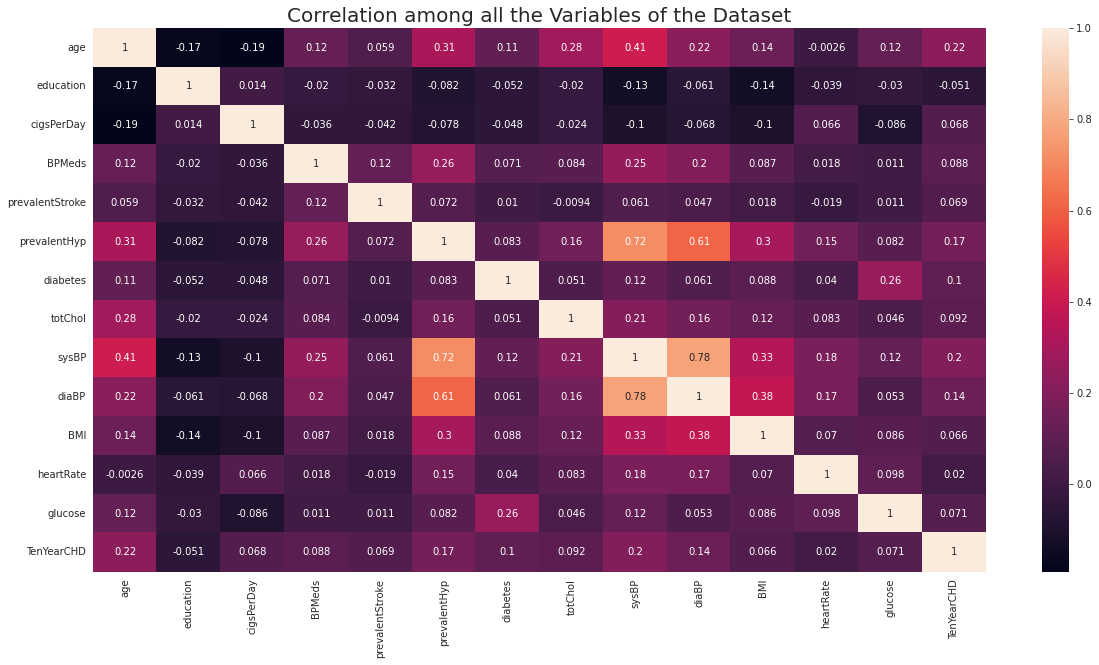

In [490]:
#Checking relationship between variables
cor=data.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

1. Univariate Analysis

Categorical Features

In [491]:
categorical_features = ['sex', 'education', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [492]:
for feature in categorical_features:
    print(feature,':')
    print(data[feature].value_counts())
    print("-----------------")

sex :
F    1923
M    1466
Name: sex, dtype: int64
-----------------
education :
1.0    1477
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64
-----------------
is_smoking :
NO     1703
YES    1686
Name: is_smoking, dtype: int64
-----------------
BPMeds :
0.000000    3245
1.000000     100
0.029886      44
Name: BPMeds, dtype: int64
-----------------
prevalentStroke :
0    3367
1      22
Name: prevalentStroke, dtype: int64
-----------------
prevalentHyp :
0    2321
1    1068
Name: prevalentHyp, dtype: int64
-----------------
diabetes :
0    3302
1      87
Name: diabetes, dtype: int64
-----------------


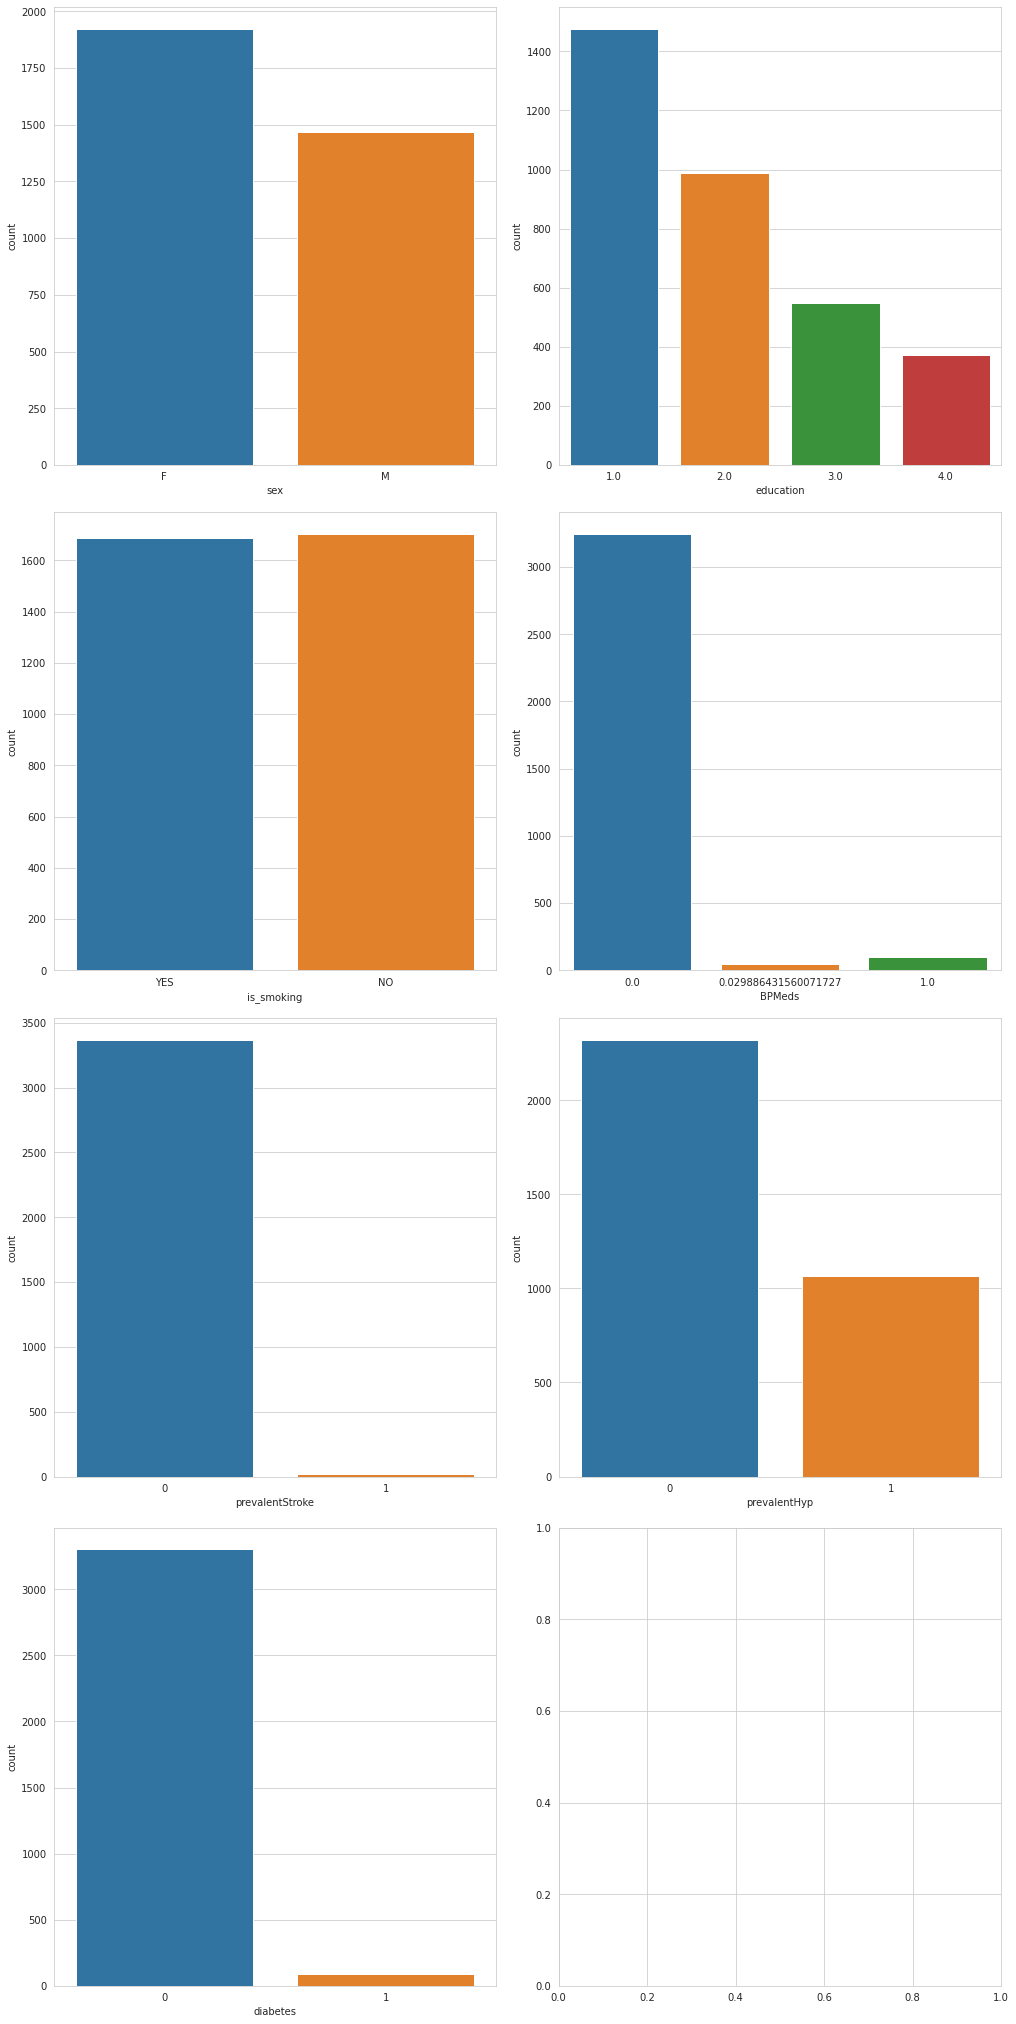

In [493]:
num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=data, ax=axs[row][pos])

Among the categorical features:

BPmeds, prevalentStroke and diabetes are highly imbalanced.

There are four levels of education whereas the rest categorical features are all binary

The number of Smokers and non-Smokers in is_smoking is almost the same

Numerical Features

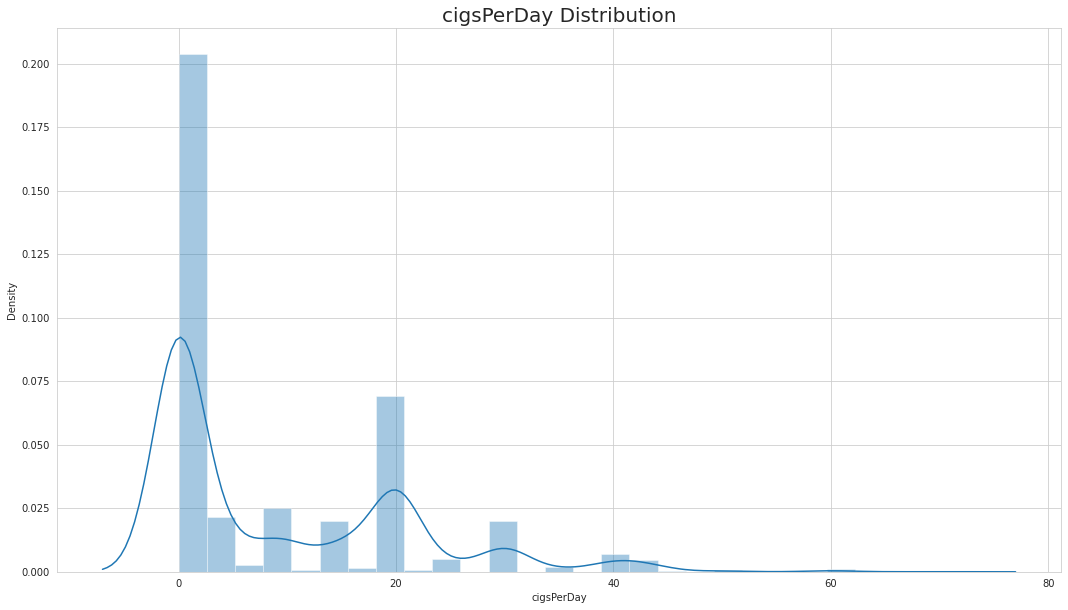

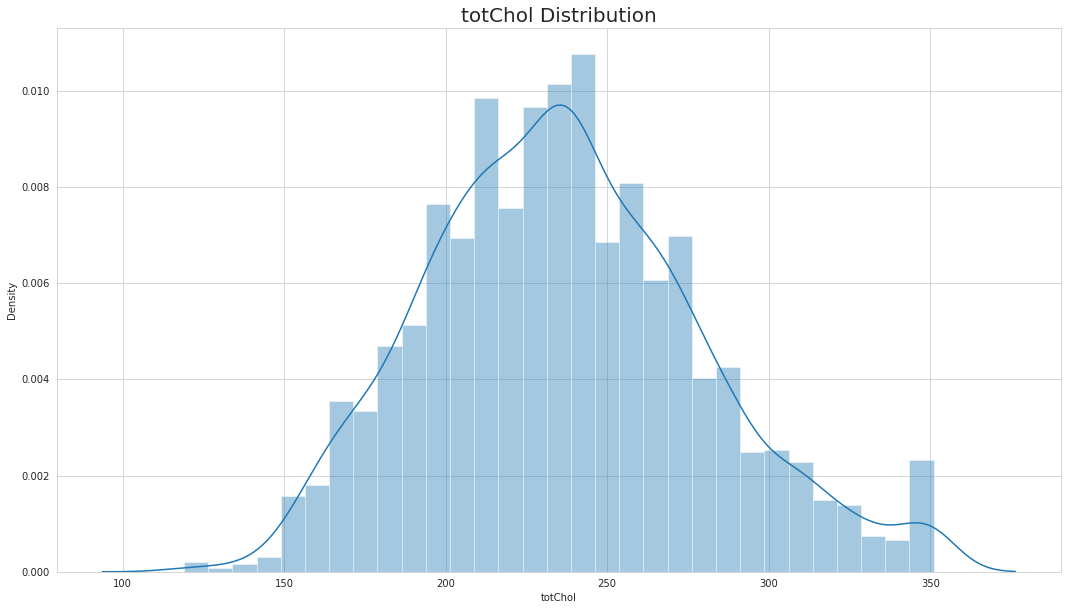

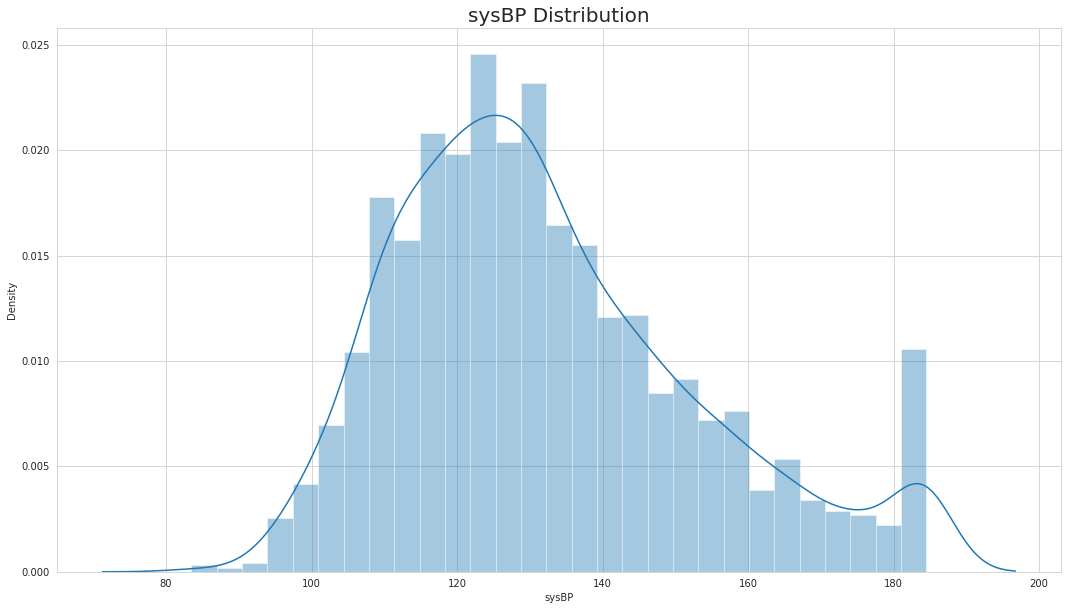

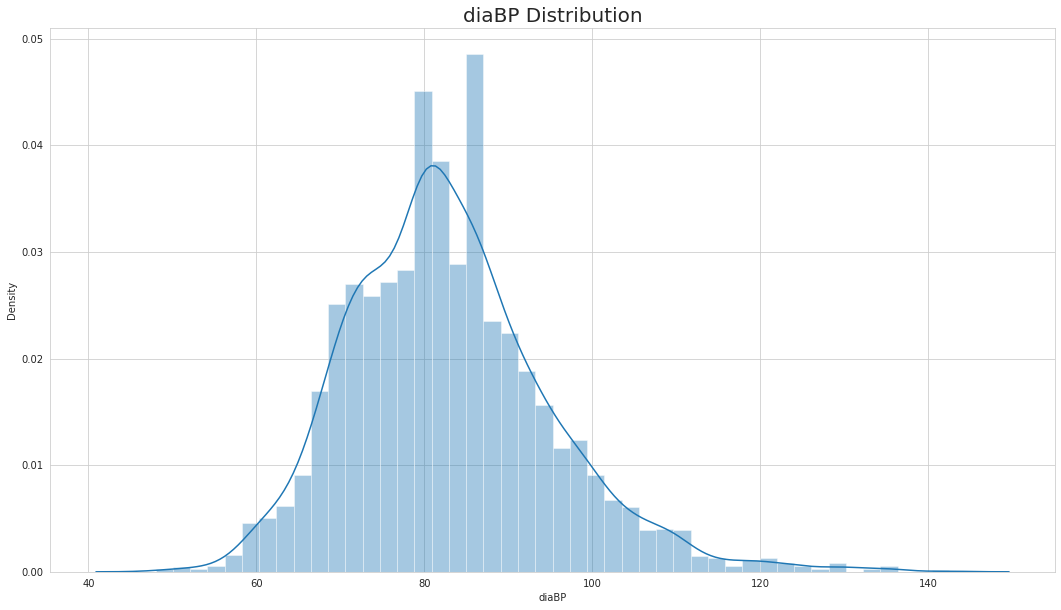

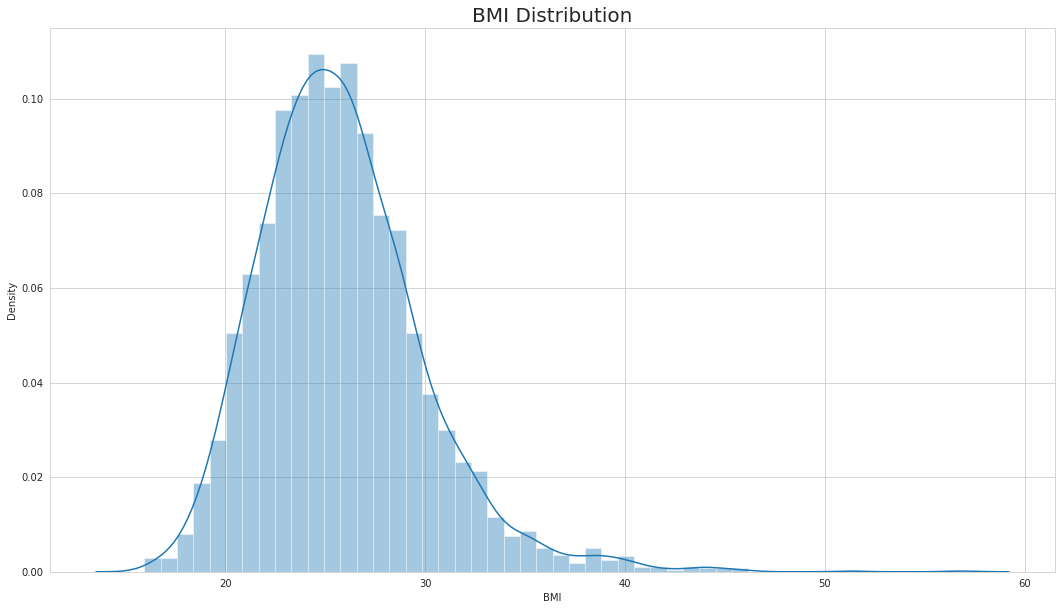

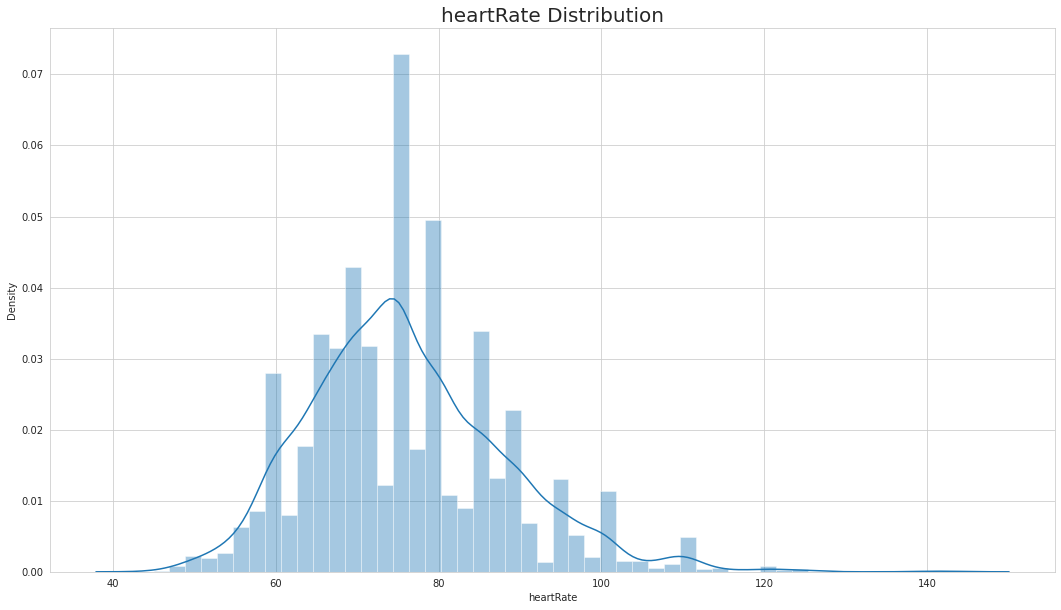

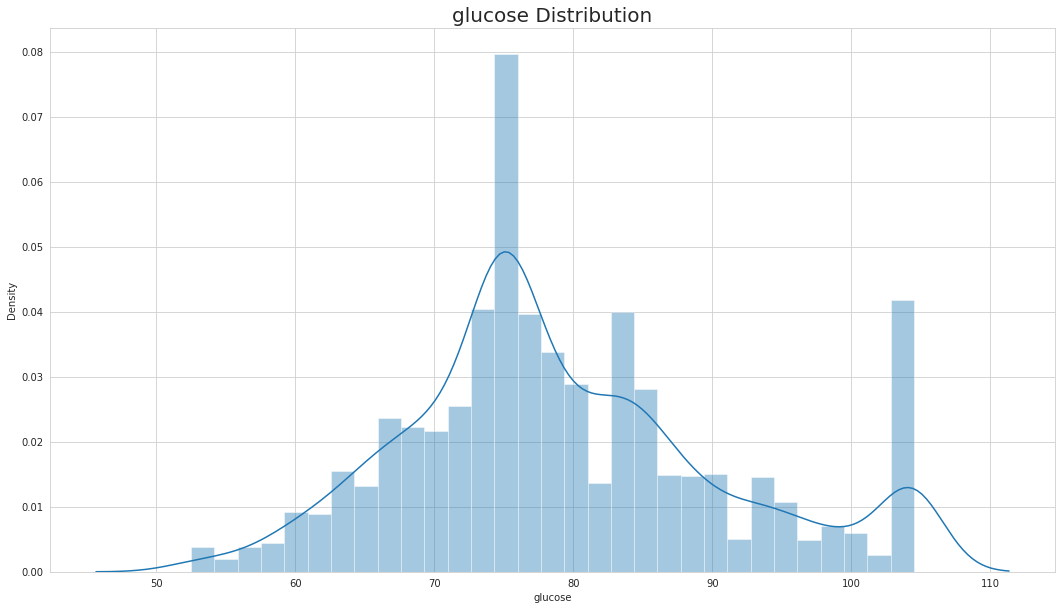

In [494]:
numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(data[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

Among the numerical features:

totChol, sysBP, diaBPand BMI has an uniform distribution and the rest are unevenly distributed

cigsPerDay has a highly uneven distribution with the most data present in 

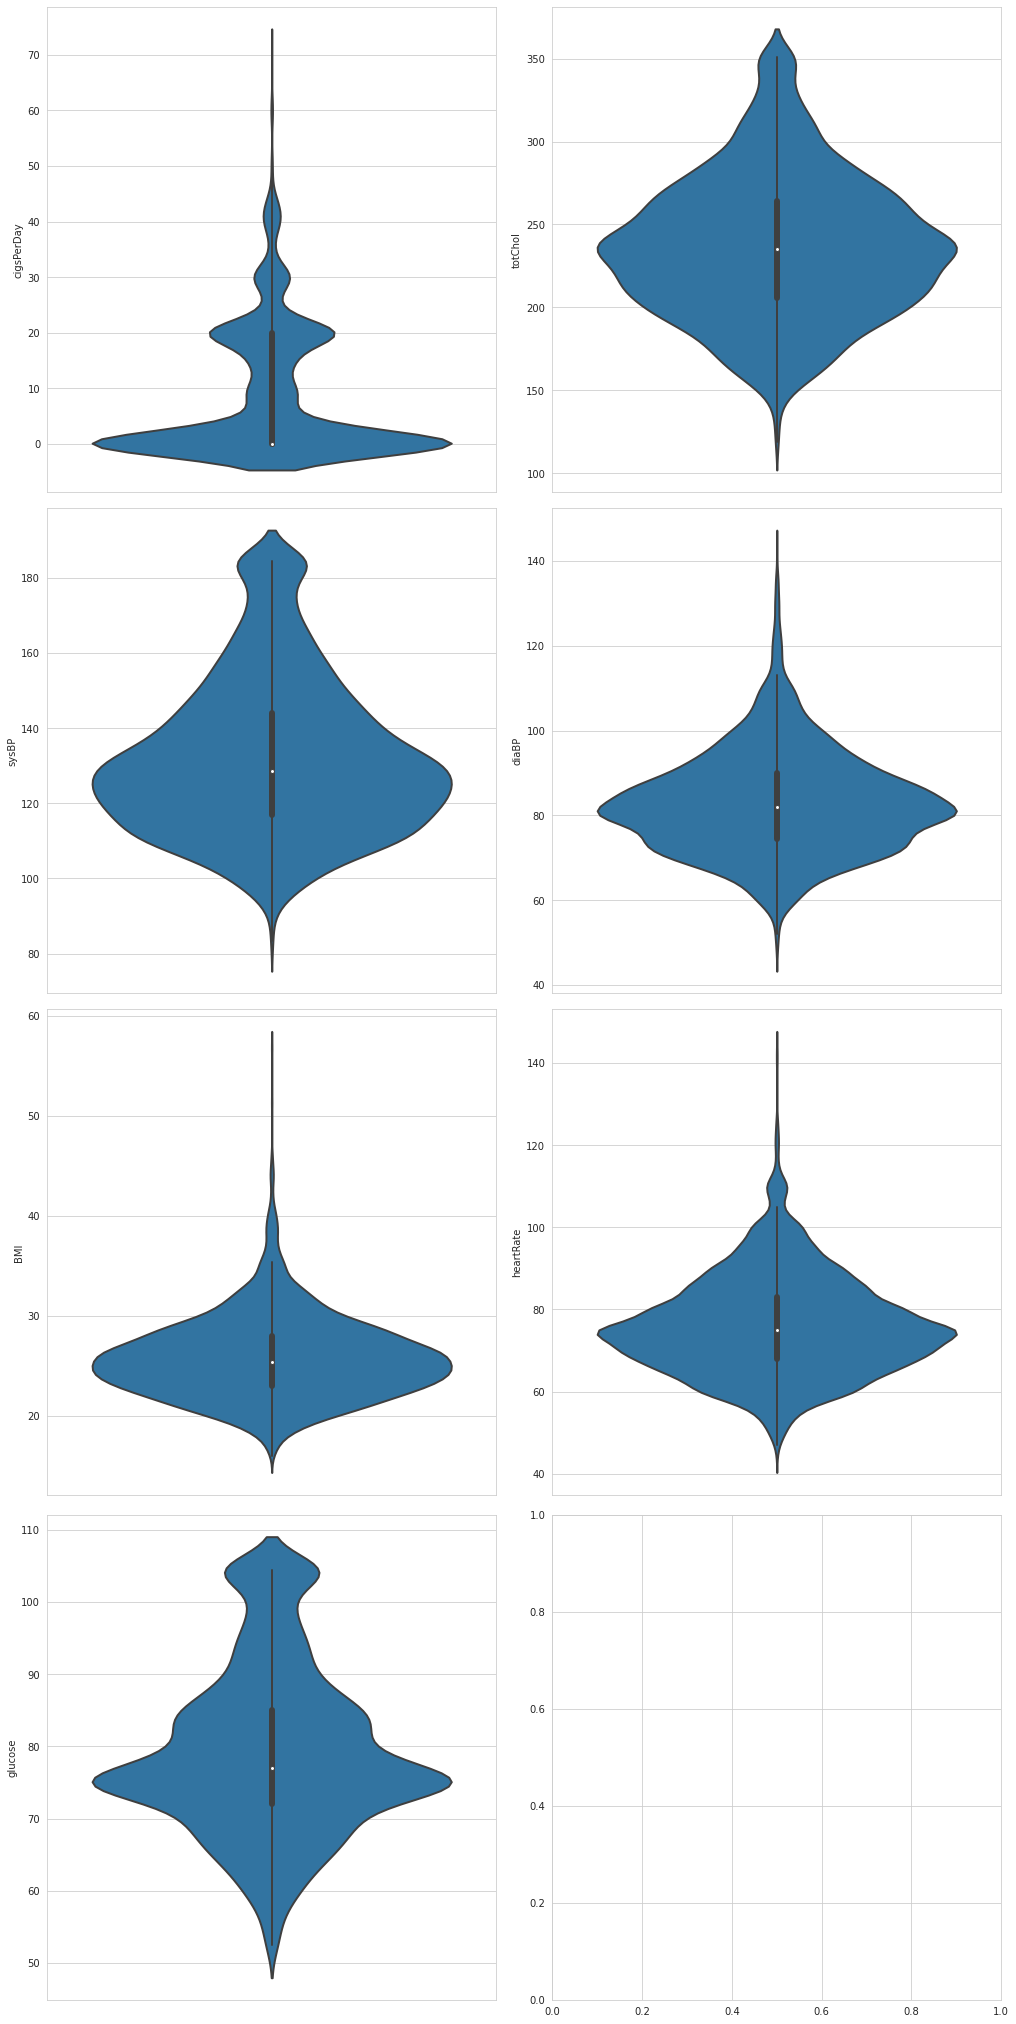

In [495]:
num_plots = len(numeric_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
color = ['m', 'g', 'b', 'r', 'y', 'v', 'o']
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(numeric_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.violinplot(y=var, data=data, ax=axs[row][pos], linewidth=2)

cigsPerDay has uneven distribution although most of the data is concentrated on 0

Target Variable

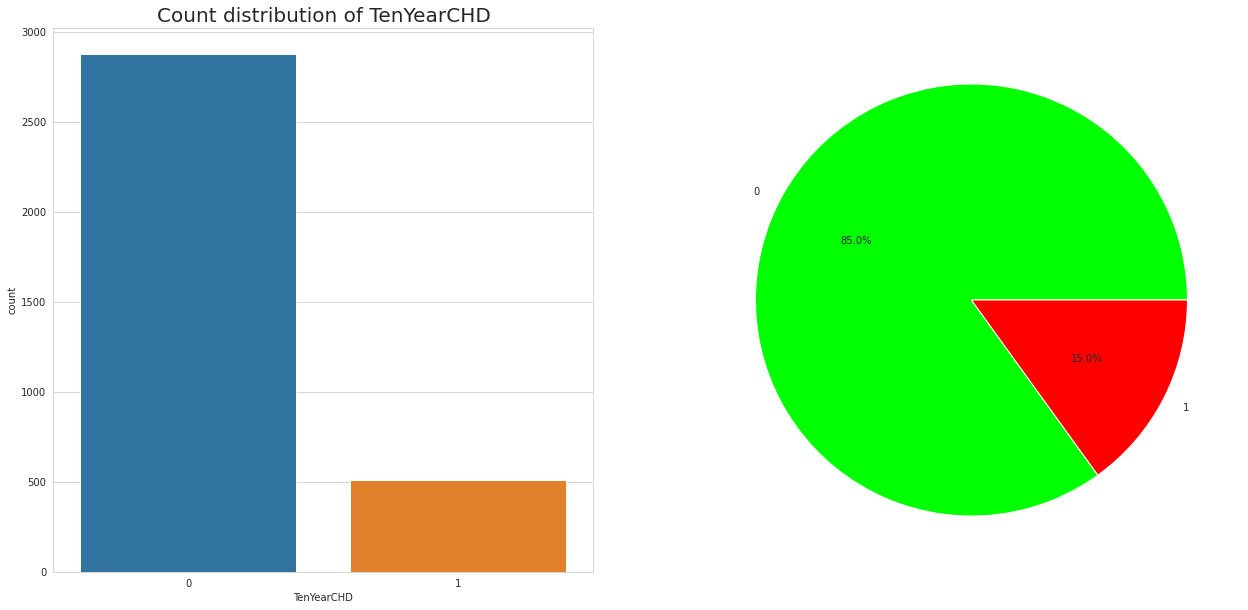

In [496]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=data)
plt.title("Count distribution of TenYearCHD", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(data["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["lime","red"])
plt.show()

The distribution is highly imbalanced. As in, the number of negative cases outweigh the number of positive cases. This would lead to class imbalance problem while fitting our models. Therefore, this problem needs to be addressed and taken care of.

2. Bivariate Analysis

  Relationship between education and cigsPerDay


In [497]:
#Grouping education and cigsPerDay

graph_1 = data.groupby("education", as_index=False).cigsPerDay.mean()

(array([ 2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 7 Text major ticklabel objects>)

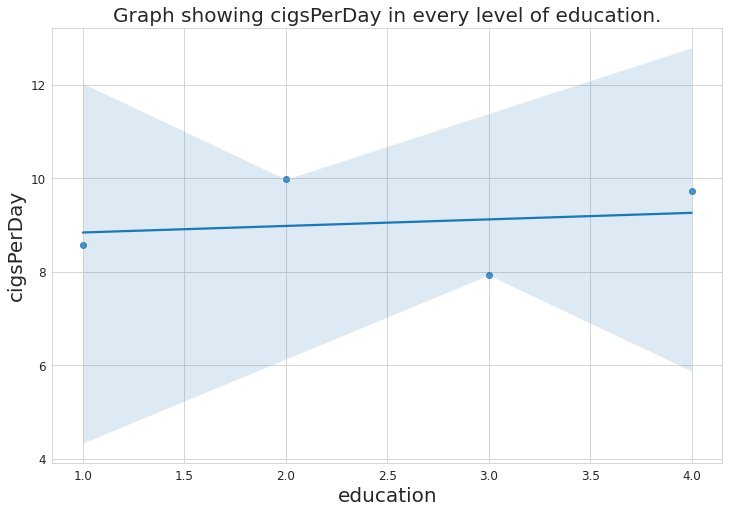

In [498]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_1["education"], y=graph_1["cigsPerDay"])
plt.title("Graph showing cigsPerDay in every level of education.", size=20)
plt.xlabel("education", size=20)
plt.ylabel("cigsPerDay", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

There is no linear relationship observed.

Level 3 education shows the lowest mean.

Which gender has more risk of coronary heart disease CHD

In [499]:
#checking for which gender has more risk of coronary heart disease CHD

graph_2 = data.groupby("sex", as_index=False).TenYearCHD.sum()

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

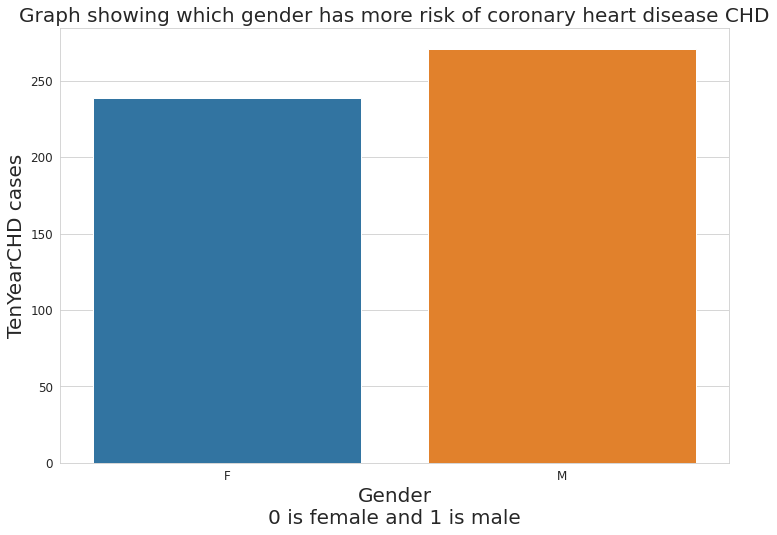

In [500]:
#Ploting the above values

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_2["sex"], y=graph_2["TenYearCHD"])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD", size=20)
plt.xlabel("Gender\n0 is female and 1 is male",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

According to this dataset, males have shown a slighly higher risk of coronary heart disease TenYearCHD.

Which age group has more smokers.

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

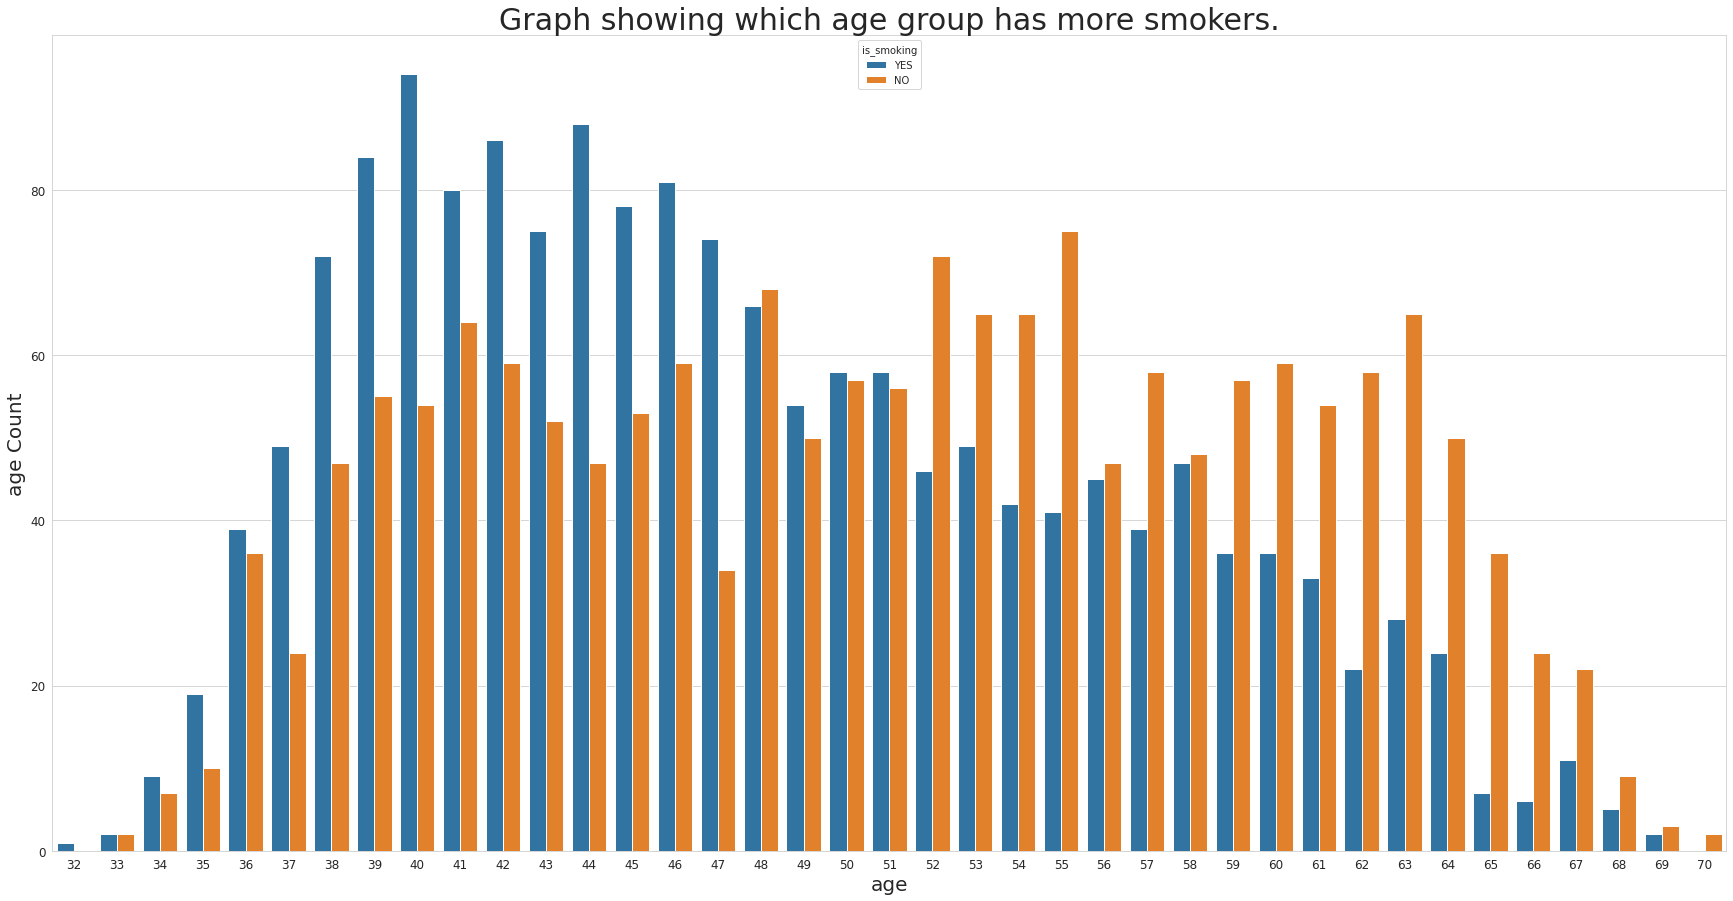

In [501]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="age",data=data,hue="is_smoking")
plt.title("Graph showing which age group has more smokers.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("age Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

Mid-age groups ranging from the age of 38 - 46 have more number of currentSmokers

No currentSmokers observed below the age of 32

maximum age for is_smoking is 70

Relation between cigsPerDay and risk of coronary heart disease.

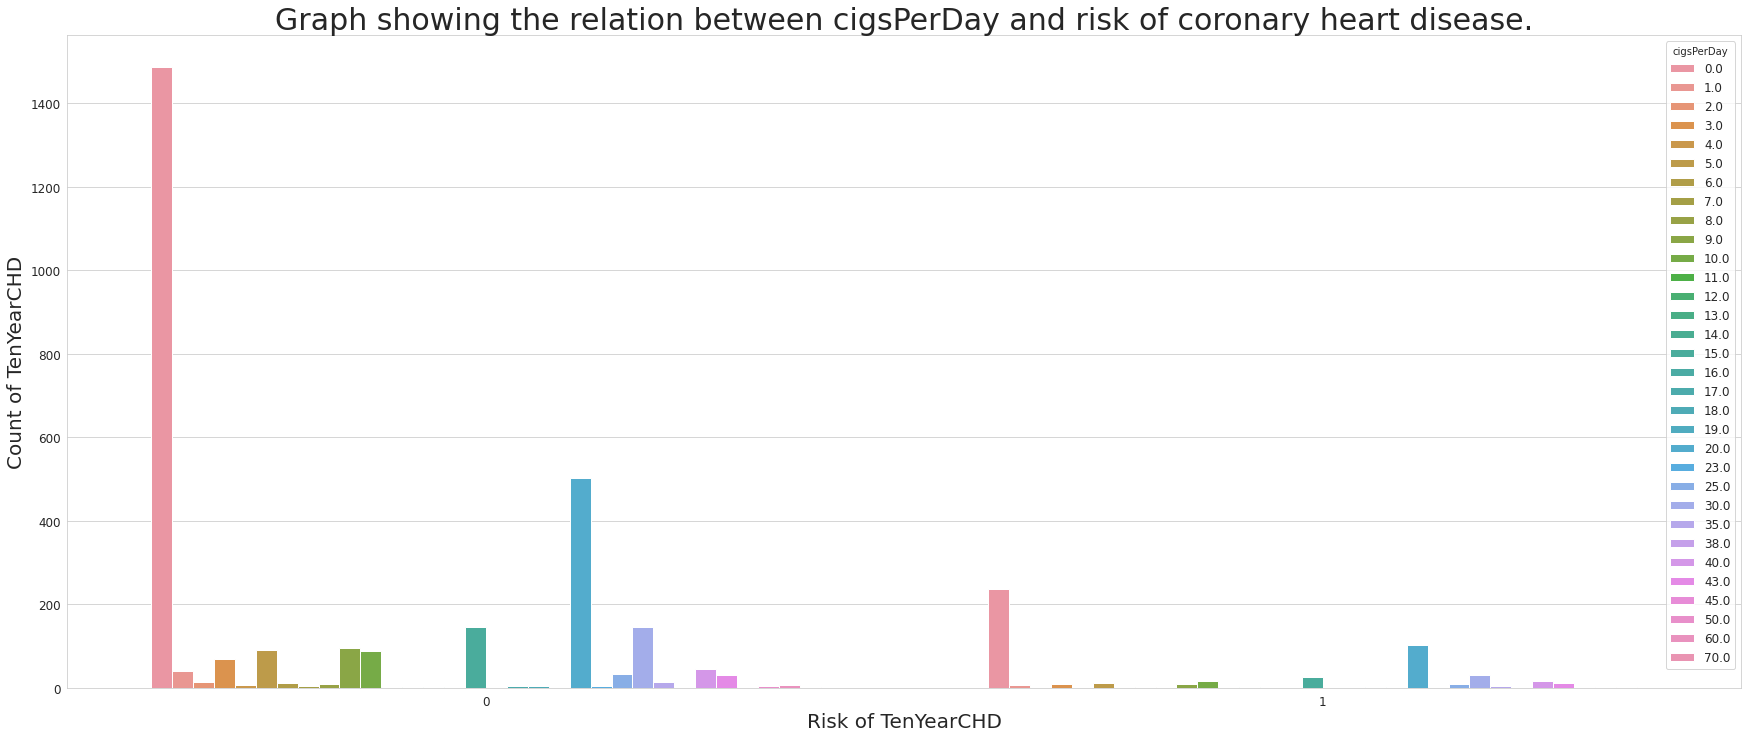

In [502]:
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="TenYearCHD",data=data,hue="cigsPerDay")
plt.legend(title='cigsPerDay', fontsize='large')
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease.", size=30)
plt.xlabel("Risk of TenYearCHD", size=20)
plt.ylabel("Count of TenYearCHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

Low cigsPerDay comes with lower risk of CHD.

Those who don't smoke, i.e., with a cigsPerDay of 0.0 has a really low risk of contracting the disease

Although that is the case, low cigsPerDay doesn't actually guarantee a much lower risk of CHD

Relation between sysBP and risk of CHD.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

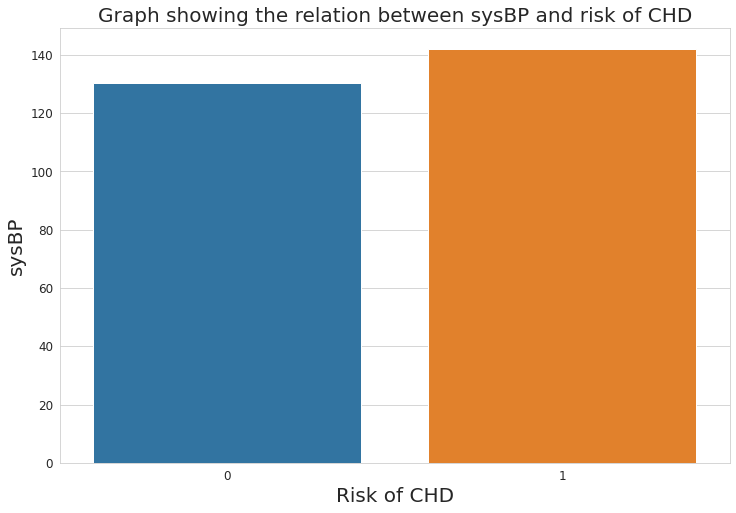

In [503]:
# Grouping up the data and ploting it

graph_3 = data.groupby("TenYearCHD", as_index=False).sysBP.mean()

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_3["TenYearCHD"], y=graph_3["sysBP"])
plt.title("Graph showing the relation between sysBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("sysBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

(array([ 60.,  70.,  80.,  90., 100., 110., 120., 130., 140., 150.]),
 <a list of 10 Text major ticklabel objects>)

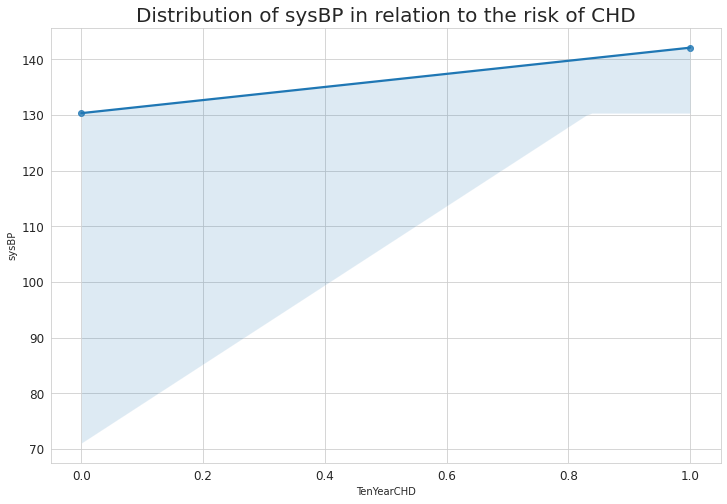

In [504]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_3["TenYearCHD"], y=graph_3["sysBP"])
plt.title("Distribution of sysBP in relation to the risk of CHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

Minor relation of higher risk of TenYearCHD found with higher sysBP

Majority of people with sysBP ranging from 72 - 130 has lower chance of contracting the disease.

Relation between diaBP and risk of CHD

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

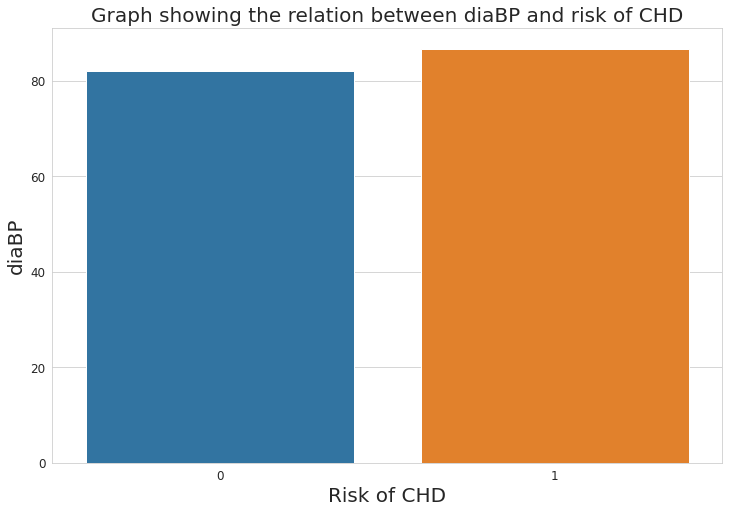

In [505]:
# Grouping up the data and ploting it

graph_4 = data.groupby("TenYearCHD", as_index=False).diaBP.mean()

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_4["TenYearCHD"], y=graph_4["diaBP"])
plt.title("Graph showing the relation between diaBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("diaBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

(array([40., 50., 60., 70., 80., 90.]),
 <a list of 6 Text major ticklabel objects>)

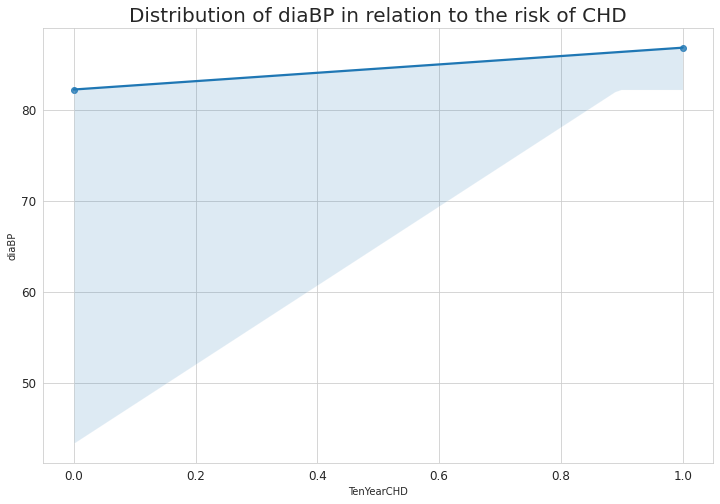

In [506]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_4["TenYearCHD"], y=graph_4["diaBP"])
plt.title("Distribution of diaBP in relation to the risk of CHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

Minor relation found between higher risk of TenYearCHD with higher diaBP similar to the previous one

Majority of people with diaBP ranging upto 80.0 has lower chance of contracting the disease.

Relation between age and totChol

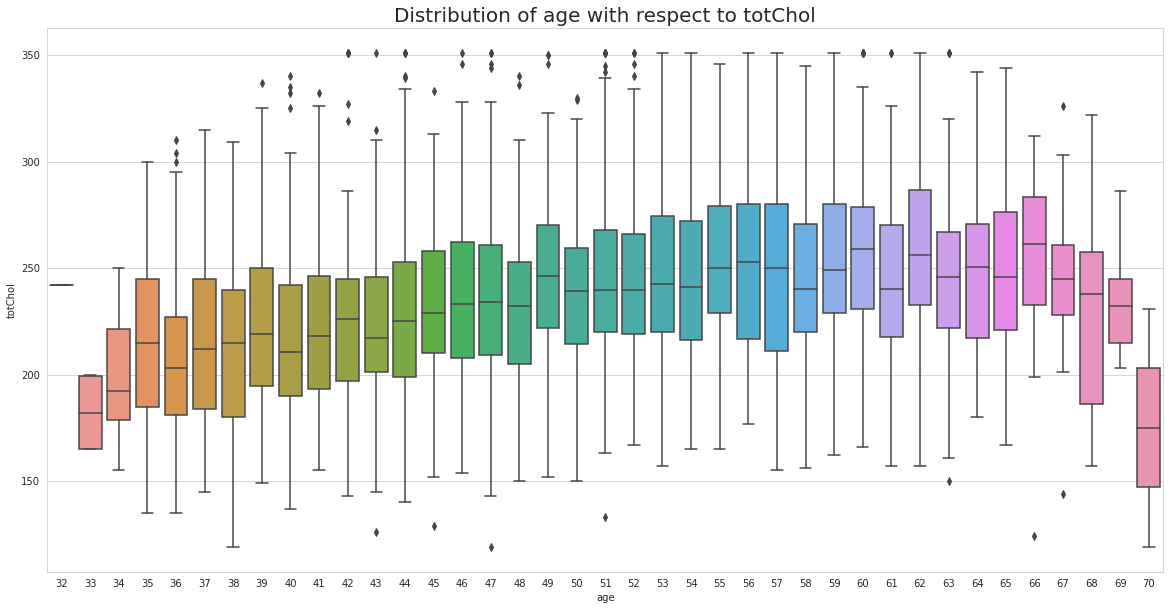

In [507]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(x="age",y="totChol",data=data)
plt.title("Distribution of age with respect to totChol", size=20)
plt.show()

The boxplots are shifted in an upwardly manner suggesting that aged people have more cholesterol (bad cholesterol in general)

3. Multivariate Analysis

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

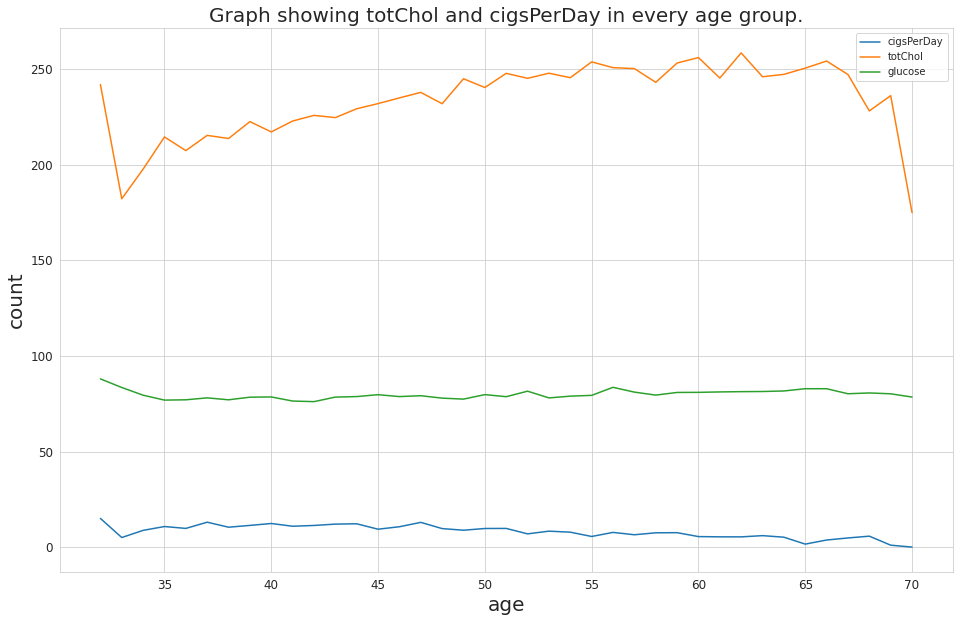

In [508]:
#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.

graph_5 = data.groupby("age").cigsPerDay.mean()
graph_6 = data.groupby("age").totChol.mean()
graph_7 = data.groupby("age").glucose.mean()

plt.figure(figsize=(16,10), facecolor='w')
sns.lineplot(data=graph_5, label="cigsPerDay")
sns.lineplot(data=graph_6, label="totChol")
sns.lineplot(data=graph_7, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.", size=20)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

There is a minor relation between totChol and glucose.

totChol has a steep, linear and inverse graph for lower ranges of age

cigsPerDay has a fairly parallel relationship with age

Distribution of sysBP vs diaBP with respect to currentSmoker and male attributes

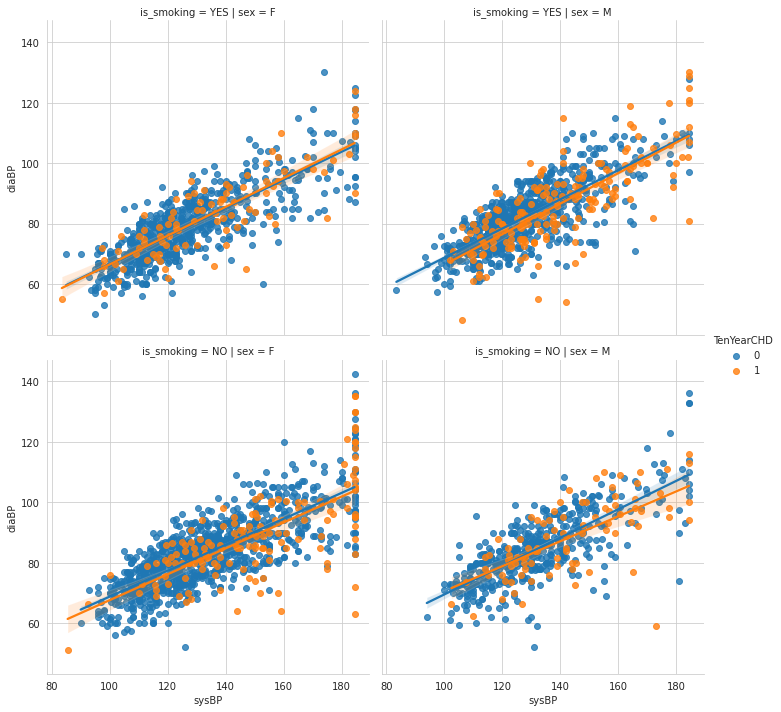

In [509]:
#sysBP vs diaBP with respect to currentSmoker and male attributes
#plt.figure(figsize=(18, 9), facecolor='w')
sns.lmplot('sysBP', 'diaBP', 
           data=data,
           hue="TenYearCHD",
           col="sex",row="is_smoking")
plt.show()

The above graph plots the relationship between systolic blood pressure and diastolic blood pressure for patients based on their gender and whether they are current smokers or not and plots the best fit line

Resampling imbalanced dataset by oversampling positive cases

In [510]:
data

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.000000,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.000000,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.000000,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.000000,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.000000,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.000000,0,0,0,261.0,123.5,79.0,29.280000,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.000000,0,0,0,199.0,102.0,56.0,21.960000,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.000000,0,1,0,351.0,164.0,119.0,28.920000,73.0,72.0,1
3388,60,1.0,M,NO,0.0,0.029886,0,1,0,191.0,167.0,105.0,23.010000,80.0,85.0,0


In [511]:
data = pd.get_dummies(data, columns = ['sex', 'is_smoking'])
print(data)

      age  education  cigsPerDay    BPMeds  prevalentStroke  prevalentHyp  \
0      64        2.0         3.0  0.000000                0             0   
1      36        4.0         0.0  0.000000                0             1   
2      46        1.0        10.0  0.000000                0             0   
3      50        1.0        20.0  0.000000                0             1   
4      64        1.0        30.0  0.000000                0             0   
...   ...        ...         ...       ...              ...           ...   
3385   60        1.0         0.0  0.000000                0             0   
3386   46        1.0         0.0  0.000000                0             0   
3387   44        3.0         3.0  0.000000                0             1   
3388   60        1.0         0.0  0.029886                0             1   
3389   54        3.0         0.0  0.000000                0             0   

      diabetes  totChol  sysBP  diaBP        BMI  heartRate  glucose  \
0  

In [512]:
data.head(3)

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M,is_smoking_NO,is_smoking_YES
0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1,1,0,0,1
1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0,0,1,1,0
2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,1,0,0,1


**Feature Selection**

In [515]:
#To idenfify the features that have larger contribution towards the outcome variable, TenYearCHD
X=data.iloc[:,0:15]
y=data.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (3389, 15) 
y -  (3389,)


In [516]:
#Apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=10)

In [517]:
fit=best.fit(X,y)

In [518]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [519]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

         Feature         Score
2     cigsPerDay  30835.814947
8          sysBP    240.675120
0            age    226.017807
9          diaBP     91.095354
14         sex_F     67.904237
10           BMI     66.315774
7        totChol     65.116383
5   prevalentHyp     33.321116
12       glucose     29.796412
11     heartRate     24.714802
6       diabetes      9.378151


In [520]:
#Select 8 features
features=scores["Feature"].tolist()[:8]
features

['age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol']

In [521]:
data=data[['cigsPerDay', 'age', 'sysBP', 'sex_F', 'diaBP', 'totChol', 'BMI', 'glucose','TenYearCHD']]
data.head()

,cigsPerDay,age,sysBP,sex_F,diaBP,totChol,BMI,glucose,TenYearCHD
0,3.0,64,148.0,1,85.0,221.0,25.794964,80.0,1
1,0.0,36,168.0,0,98.0,212.0,29.770000,75.0,0
2,10.0,46,116.0,1,71.0,250.0,20.350000,94.0,0
3,20.0,50,158.0,0,88.0,233.0,28.260000,94.0,1
4,30.0,64,136.5,1,85.0,241.0,26.420000,77.0,0


# **Feature Splitting and Scaling**

In [513]:
y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis=1)

In [514]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN(sampling_strategy='minority')
X_sm, y_sm = sm.fit_resample(X, y)
y_sm.value_counts()

1    2691
0    1571
Name: TenYearCHD, dtype: int64

In [403]:

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 0)

We divide the dataset into training and test sub-datasets for predictive modeling

In [299]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Predictive Modeling**

We use the following different machine learning models for the dataset:

  Logistic Regressor

  K-Nearest Neighbour Classifier

  Random Forest Classifier

  Decision Tree Classifier

  Gradient Boosting Classifier

In [404]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[363 140]
 [117 658]]


Accuracy of Logistic Regression: 79.8904538341158 

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       503
           1       0.82      0.85      0.84       775

    accuracy                           0.80      1278
   macro avg       0.79      0.79      0.79      1278
weighted avg       0.80      0.80      0.80      1278



In [405]:
#Train Score
lr_train=lr.score(X_train,y_train)
lr_train

0.8355704697986577

In [406]:
#Test Score
lr_test=lr.score(X_test,y_test)
lr_test

0.798904538341158

In [407]:
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(y_test, knn_predict))

confussion matrix
[[483  20]
 [  4 771]]


Accuracy of k-NN Classification: 98.12206572769952 

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       503
           1       0.97      0.99      0.98       775

    accuracy                           0.98      1278
   macro avg       0.98      0.98      0.98      1278
weighted avg       0.98      0.98      0.98      1278



In [408]:
#Train Score
dt_train=knn.score(X_train,y_train)
dt_train

1.0

In [409]:
#Test Score
dt_test=knn.score(X_test,y_test)
dt_test

0.9812206572769953

In [410]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[397 106]
 [ 35 740]]


Accuracy of Random Forest: 88.96713615023474 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       503
           1       0.87      0.95      0.91       775

    accuracy                           0.89      1278
   macro avg       0.90      0.87      0.88      1278
weighted avg       0.89      0.89      0.89      1278



In [411]:
#Train Score
dt_train=rf.score(X_train,y_train)
dt_train

0.9976510067114094

In [412]:
#Test Score
dt_test=rf.score(X_test,y_test)
dt_test

0.8896713615023474

In [413]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(X_train,y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[383 120]
 [ 63 712]]


Accuracy of DecisionTreeClassifier: 85.68075117370893 

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       503
           1       0.86      0.92      0.89       775

    accuracy                           0.86      1278
   macro avg       0.86      0.84      0.85      1278
weighted avg       0.86      0.86      0.86      1278



In [414]:
#Train Score
dt_train=dt.score(X_train,y_train)
dt_train

1.0

In [415]:
#Test Score
dt_test=dt.score(X_test,y_test)
dt_test

0.8568075117370892

In [416]:
m5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(X_train,y_train)
gvc_predicted = gvc.predict(X_test)
gvc_conf_matrix = confusion_matrix(y_test, gvc_predicted)
gvc_acc_score = accuracy_score(y_test, gvc_predicted)
print("confussion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(y_test,gvc_predicted))

confussion matrix
[[393 110]
 [ 69 706]]


Accuracy of Gradient Boosting Classifier: 85.99374021909233 

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       503
           1       0.87      0.91      0.89       775

    accuracy                           0.86      1278
   macro avg       0.86      0.85      0.85      1278
weighted avg       0.86      0.86      0.86      1278



# **Hyperparameter Tuning for best Classifier**


**Using Randomized Search Cross Validation**

In [313]:
rfc = RandomForestClassifier()

In [417]:
forest_params = [{'max_depth': list(range(10, 20, 30)),'n_estimators': list(range(200, 400, 600)), 'max_features': list(range(0,14)),'min_samples_split': list(range(2, 5, 10)), 'min_samples_leaf': list(range(1, 2, 4))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='recall')

clf.fit(X_train, y_train)
print(clf.best_score_)

0.9570926047120419


In [418]:
print(clf.best_params_)

{'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# **Hyperparameter Tuning for best Classifier**

**Using Randomized Search Cross Validation**

**Random Forest Classifier** 

In [210]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [211]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=7, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=7, verbose=2)

In [212]:
rf_hyper = rf_random.best_estimator_
rf_hyper.fit(X_train,y_train)
print("Accuracy on training set is : {}".format(rf_hyper.score(X_train,y_train)))
print("Accuracy on validation set is : {}".format(rf_hyper.score(X_test, y_test)))
rf_predicted = rf_hyper.predict(X_test)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("Accuracy of Hyper-tuned Random Forest Classifier:",rf_acc_score*100,'\n')
print(classification_report(y_test, rf_predicted))

Accuracy on training set is : 1.0
Accuracy on validation set is : 0.9220576773187841
Accuracy of Hyper-tuned Random Forest Classifier: 92.20576773187841 

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       500
           1       0.92      0.96      0.94       783

    accuracy                           0.92      1283
   macro avg       0.92      0.91      0.92      1283
weighted avg       0.92      0.92      0.92      1283



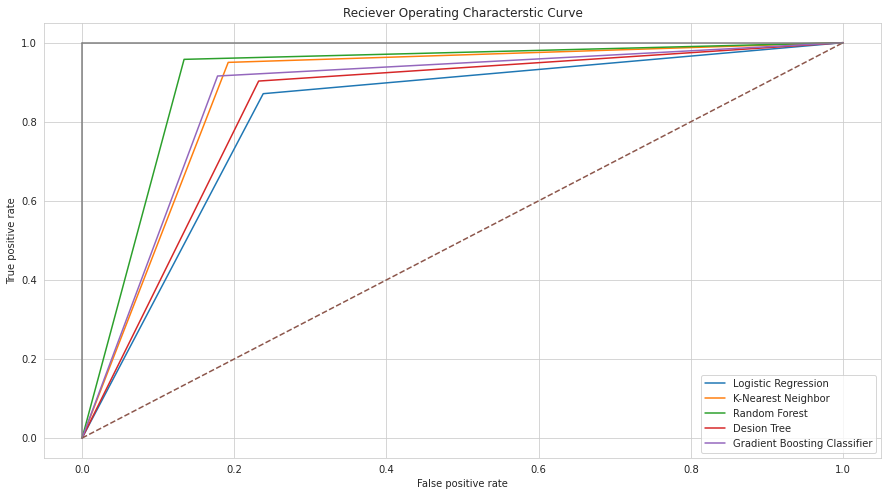

In [213]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
gvc_false_positive_rate,gvc_true_positive_rate,gvc_threshold = roc_curve(y_test,gvc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(15,8), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(gvc_false_positive_rate,gvc_true_positive_rate,label='Gradient Boosting Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# **Model Evaluation**

In [214]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','Random Forest',
                                   'Decision Tree','Gradient Boosting'], 'Accuracy': [lr_acc_score*100, knn_acc_score*100, 
                                                                                      rf_acc_score*100, dt_acc_score*100,gvc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,82.852689
1,K-Nearest Neighbour,89.477786
2,Random Forest,92.205768
3,Decision Tree,85.035074
4,Gradient Boosting,87.918940


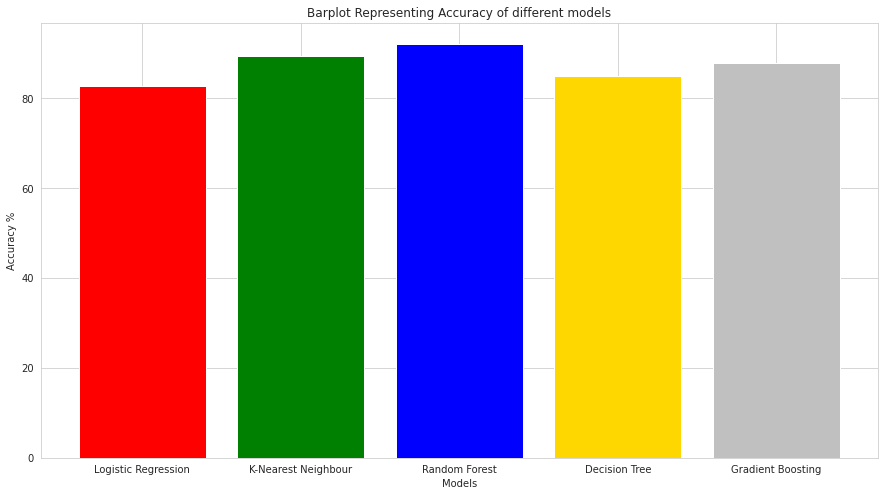

In [215]:
colors = ['red','green','blue','gold','silver']
plt.figure(figsize=(15,8), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()